In [76]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
import datetime as dt
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

# Import Matplot lib
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [39]:
# Create Database Connection
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [40]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement
Station = Base.classes.station

# Start a session to query the database
session = Session(engine)

In [41]:
# Identify most recent date 
session.query(func.max(Measurement.date)).all()

[(datetime.date(2017, 8, 23))]

In [42]:
# Retrieve the last 12 months of precipitation data. 
results = session.query(Measurement.date,Measurement.prcp).\
filter(Measurement.date <= '2017-08-23').\
filter(Measurement.date >= '2016-08-23').\
order_by(Measurement.date.desc()).all()

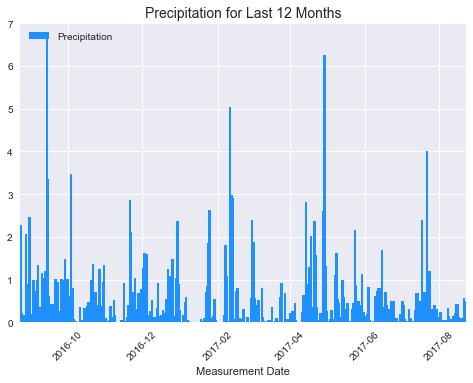

In [43]:
# Load the results into a pandas dataframe. 
prcp_data = pd.DataFrame(results)

#Plot Precipitation for the lat 12 months
plt.bar(prcp_data['date'], prcp_data['prcp'], label= 'Precipitation',
        color= 'dodgerblue', width = 2 )
plt.title('Precipitation for Last 12 Months', fontsize = 14)
plt.xlabel('Measurement Date')
plt.xlim('2016-08-23','2017-08-23')
plt.ylim(0,7)
plt.legend(loc= 'upper left')
plt.xticks(rotation=45)
plt.show()

In [44]:
### Station Analysis

#query to calculate the total number of stations.
session.query(Measurement).distinct(Measurement.station).\
            group_by(Measurement.station).count()

9

In [45]:
#query to find the most active stations.
stationQ = session.query(Measurement.station,
                         func.count(Measurement.prcp)).\
                         group_by(Measurement.station).\
                         order_by(func.count(Measurement.prcp).desc()).all()
# Display the query result
stationQ

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [46]:
# Retrieve the last 12 months of precipitation data. 
results = session.query(Measurement.tobs).\
filter(Measurement.date <= '2017-08-23').\
filter(Measurement.date >= '2016-08-23').\
filter(Measurement.station == 'USC00519281').all()

# Load the results into a pandas dataframe
tobs_data = pd.DataFrame(results)

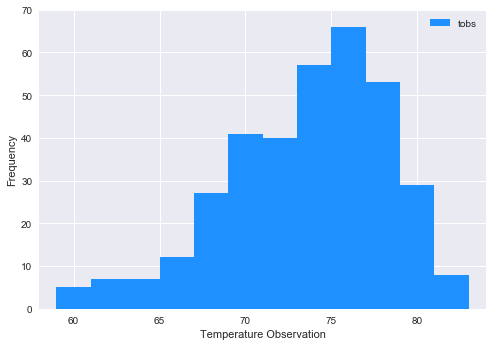

In [47]:
# Plot the results as a histogram with `bins=12`
bin_range = [59,61,63,65,67,69,71,73,75,77,79,81,83]
plt.hist(tobs_data['tobs'] ,label= 'tobs', bins=bin_range, color= 'dodgerblue')
plt.ylabel('Frequency')
plt.xlabel('Temperature Observation')
plt.ylim(0,70)
plt.xlim(58,84)
plt.legend()

plt.show()

In [48]:
### Temperature Analysis

# Create a function accepts start and end date and return the minimum, average, and maximum temperatures for that range of dates.

def calc_temps(start_date, end_date):
    return pd.DataFrame(session.query(func.avg(Measurement.tobs).label('tobs_averge'), 
                                     func.max(Measurement.tobs).label('tobs_highest'), 
                                     func.min(Measurement.tobs).label('tobs_lowest')).\
                                     filter(func.strftime('%Y-%m-%d', Measurement.date) <= end_date).\
                                     filter(func.strftime('%Y-%m-%d', Measurement.date) >= start_date).all())

In [49]:
# calculate the min, avg, and max temperatures for your trip
calc_temps('2016-06-15', '2016-08-30')

,tobs_averge,tobs_highest,tobs_lowest
0,77.458848,84,69


In [51]:
tobs_data = calc_temps('2016-06-15', '2016-08-30')
std = np.std([tobs_data.get_value(index= 0, col='tobs_highest'),tobs_data.get_value(index= 0, col='tobs_lowest')])


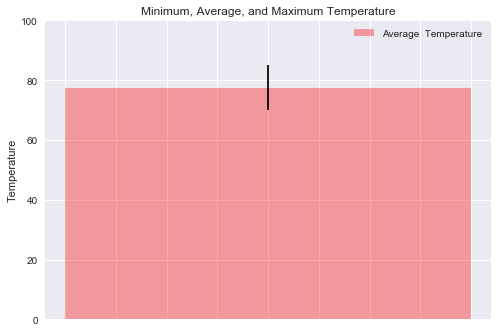

In [60]:
# Plot the min, avg, and max temperature for your planned trip.

ind = np.arange(1) 
opacity = 0.35
std = np.std([tobs_data.get_value(index= 0, col='tobs_highest'),
              tobs_data.get_value(index= 0, col='tobs_lowest')])


fig, ax = plt.subplots()
ax.bar(ind, tobs_data['tobs_averge'],  alpha=opacity, color='r',
       yerr =std, label= 'Average  Temperature' )
ax.set_title('Minimum, Average, and Maximum Temperature')
ax.set_ylabel('Temperature')
ax.set_xticklabels([])
plt.ylim(0,100)
plt.legend()
plt.show()